In [1]:
import networkx as nx
from kuramoto import Kuramoto, plot_phase_coherence, plot_activity, plot_heatmap

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style("darkgrid")
sns.set_context("paper", font_scale=2.)

## Half Synchronization Test

### 1) Complete Graph

In [3]:
nxg = nx.complete_graph(10)
natfreqs = np.repeat(2* np.pi * np.random.random(1), len(nxg.nodes()))
natfreqs

array([0.31595614, 0.31595614, 0.31595614, 0.31595614, 0.31595614,
       0.31595614, 0.31595614, 0.31595614, 0.31595614, 0.31595614])

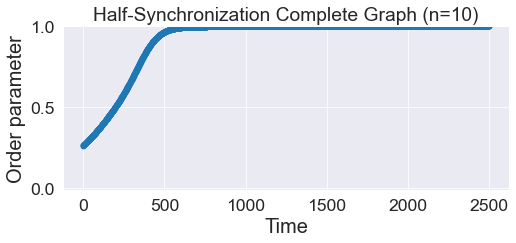

In [4]:
adj_mat = nx.to_numpy_array(nxg)
model = Kuramoto(coupling=0.75, dt=0.01, T=25, natfreqs = natfreqs)
sim = model.run(adj_mat)

plt = plot_phase_coherence(sim)
plt.set_title('Half-Synchronization Complete Graph (n=10)');

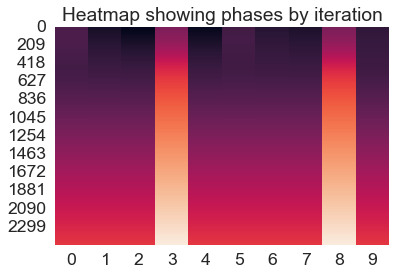

In [5]:
plot_heatmap(sim);

In [6]:
model.concentrated

True

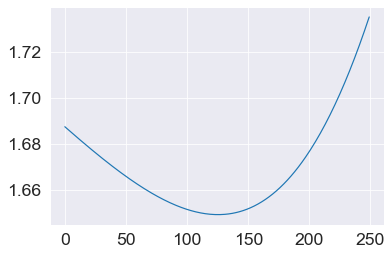

In [7]:
pd.DataFrame(sim.T[:250,:]).std(axis=1).plot();

In [40]:
sim[:250,:]

array([[ 3.9625008 ,  3.96352477,  3.96453997, ...,  9.68092879,
         9.68408962,  9.68725044],
       [ 1.85831187,  1.86216329,  1.8660155 , ...,  9.68092877,
         9.6840896 ,  9.68725043],
       [ 0.99245478,  0.99764149,  1.00283385, ...,  9.68092877,
         9.68408959,  9.68725042],
       ...,
       [ 2.06914404,  2.07254683,  2.07594964, ...,  9.68092878,
         9.6840896 ,  9.68725043],
       [ 5.67088946,  5.6747984 ,  5.67871195, ..., 15.96411404,
        15.96727487, 15.9704357 ],
       [ 2.88420181,  2.88594954,  2.88769418, ...,  9.68092878,
         9.68408961,  9.68725043]])

In [53]:
df1 = pd.DataFrame()
df2 = pd.DataFrame(sim[:250,:].flatten(order='C')).T
df = pd.concat([df1, df2], axis=1)
df

,0,1,2,3,4,5,6,7,8,9,...,24990,24991,24992,24993,24994,24995,24996,24997,24998,24999
0,3.962501,3.963525,3.96454,3.965546,3.966544,3.967533,3.968513,3.969484,3.970446,3.971399,...,9.658803,9.661964,9.665125,9.668285,9.671446,9.674607,9.677768,9.680929,9.68409,9.68725


### 2)  [Karate Club Graph](https://en.wikipedia.org/wiki/Zachary%27s_karate_club)

In [45]:
nxg = nx.karate_club_graph()
natfreqs = np.repeat(2* np.pi * np.random.random(1), len(nxg.nodes()))

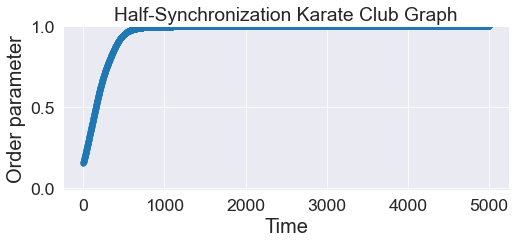

In [46]:
adj_mat = nx.to_numpy_array(nxg)
model = Kuramoto(coupling=0.5, dt=0.01, T=50, natfreqs = natfreqs)
sim = model.run(adj_mat)

plt = plot_phase_coherence(sim)
plt.set_title('Half-Synchronization Karate Club Graph');

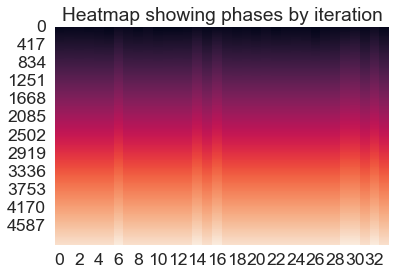

In [47]:
plot_heatmap(sim);

In [48]:
model.concentrated

True

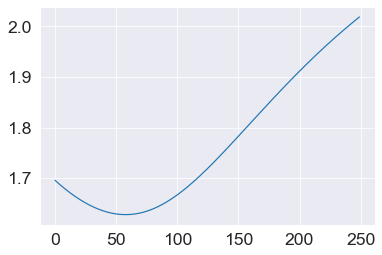

In [49]:
pd.DataFrame(sim.T[:250,:]).std(axis=1).plot();

### 3) Uniformly Random Tree

In [50]:
tree = nx.random_tree(n=25)
natfreqs = np.repeat(2* np.pi * np.random.random(1), len(tree.nodes()))
print(nx.forest_str(tree, sources=[0]))

╙── 0
    └── 17
        ├── 20
        │   └── 18
        │       └── 12
        └── 21
            └── 16
                ├── 1
                └── 2
                    ├── 5
                    │   └── 11
                    └── 19
                        └── 10
                            ├── 3
                            ├── 15
                            │   └── 6
                            │       ├── 7
                            │       └── 22
                            └── 14
                                ├── 4
                                └── 8
                                    ├── 9
                                    └── 13
                                        └── 23
                                            └── 24


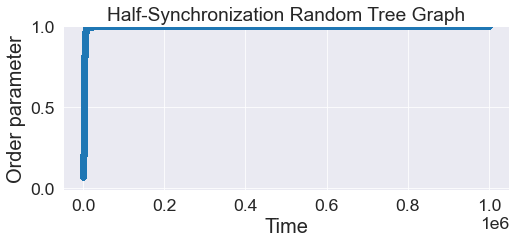

In [51]:
adj_mat = nx.to_numpy_array(tree)
model = Kuramoto(coupling=0.5, dt=0.01, T=10000, natfreqs = natfreqs)
sim = model.run(adj_mat)

plt = plot_phase_coherence(sim)
plt.set_title('Half-Synchronization Random Tree Graph');

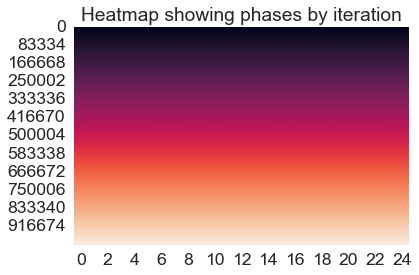

In [52]:
plot_heatmap(sim);

In [53]:
model.concentrated

True

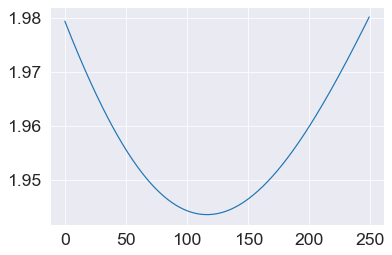

In [54]:
pd.DataFrame(sim.T[:250,:]).std(axis=1).plot();